## Imports

In [21]:
#import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
#from functions import calculateTWR
from pathlib import Path

In [251]:
%matplotlib inline

## Folders

In [252]:
cwd =  Path.cwd()

folder = cwd.parent /'Data'/'IBActivity'

tables = cwd.parent /'Data'/ 'Tables'
#cwd.parent / 'Data'
folder

WindowsPath('d:/Javier/SynologyDrive/Portfolio Python 2/Data/IBActivity')

## Functions

In [253]:
#Calulate Period Return
def calculate_periodReturn(amounts, cash=0):
    pr = (amounts - (amounts.shift() + cash))/(amounts.shift() + cash)
    return pr

In [254]:
def calculateTWR(amounts, cash=0):
    ###Returns TWR of amount series
    ##Period return = amount - amount previous period / amount previous period
    #TWR = (Cummulative product of Period returns +1 ) - 1
    # Times 100 as a percentage
    # #df['TWR'] = ((df['PeriodReturn']+1).cumprod()-1)*100
    #amount (series)
    ###
    # twr = ((( ((amounts- amounts.shift() - cash)/amounts.shift() - cash))+1).cumprod()-1)*100
    twr = ((((amounts - amounts.shift() - cash)/(amounts.shift() + cash)) + 1).cumprod() -1) * 100
    return twr


## SP500

In [392]:
# Date Ranges for SP 500

start_sp = datetime.datetime(2019, 2, 13)
end_sp =  datetime.datetime(2019, 10, 2)
# The below will pull back stock SP500 Total Return.

yf.pdr_override() # <== that's all it takes :-)
sp500 = pdr.get_data_yahoo('^SP500TR', start_sp, end_sp)
#Resample by month, quarter, year ...:
#sp500resample = sp500.resample('BM').last() #Uncoment one
#No resample eg daily:
sp500resample = sp500.copy() #Uncoment one
start_sp, end_sp
                            

[*********************100%***********************]  1 of 1 downloaded


(datetime.datetime(2019, 2, 13, 0, 0), datetime.datetime(2019, 10, 2, 0, 0))

In [393]:
#df = sp500resample['Adj Close'].reset_index().copy()
df.set_index('Date',inplace=True)

In [394]:
# Add TWR column to sp500
df['TWR'] = calculateTWR(df['Adj Close'])
# Add PR column to SP500
df['PR'] = calculate_periodReturn(df['Adj Close'])

In [395]:
df

,Adj Close,TWR,PR
Date,,,
2019-02-12,5468.98,NaN,NaN
2019-02-13,5485.97,0.310661,0.003107
2019-02-14,5473.33,0.079540,-0.002304
2019-02-15,5533.27,1.175539,0.010951
2019-02-19,5541.98,1.334801,0.001574
...,...,...,...
2019-09-25,6023.46,10.138636,0.006160
2019-09-26,6009.19,9.877710,-0.002369
2019-09-27,5978.11,9.309414,-0.005172


## Portfolio

In [396]:
# Read portfolio value table
pv = pd.read_csv(tables/'tables_portfolio_value.csv')
pv['Current Total'] = pv['Current Total'].astype(float)
pv['Date'] =  pd.to_datetime(pv['Date'])
pv.set_index('Date', inplace=True)
#pv.set_index('Date')


In [397]:
dw = pd.read_csv(tables/'tables_DW_In_Base.csv')
dw['DW_In_Base'] = dw['DW_In_Base'].astype(float)
dw['Date'] =  pd.to_datetime(dw['Date'])
dw.set_index('Date', inplace=True)
#dw.drop(columns= ['Currency','Settle Date','Description','Amount'], inplace=True)


In [398]:
pv = pv.merge(dw, left_on='Date', right_on='Date', how='left')
pv.fillna(0, inplace=True)



In [399]:
#Custom dates
initDate = datetime.datetime(2019, 2, 11)
pv = pv.loc[initDate:]

In [400]:
#Resample monthly

#pv = pv.resample('BM').agg({'Current Total':'last','DW_In_Base':'sum'})

In [401]:
#Calculate TWR
pv['TWR'] = calculateTWR(pv['Current Total'], cash=pv['DW_In_Base'])
# Calculate Period Return
pv['PR'] = calculate_periodReturn(pv['Current Total'], cash=pv['DW_In_Base'])

In [402]:
# Portfolio
pv

,Current Total,DW_In_Base,TWR,PR
Date,,,,
2019-02-11,106536.887931,0.0,NaN,NaN
2019-02-12,108293.728682,0.0,1.649045,0.016490
2019-02-13,108463.050415,0.0,1.807977,0.001564
2019-02-14,108773.759442,0.0,2.099622,0.002865
2019-02-15,108934.852332,0.0,2.250830,0.001481
...,...,...,...,...
2019-09-26,138267.545993,0.0,14.351591,-0.005471
2019-09-27,135905.997091,0.0,12.398516,-0.017080
2019-09-30,142311.857039,4409.4,13.997764,0.014228


## Plot SP500 and Portfolio returns

In [403]:
#Portfolio TWR Column to plot
fig1 = pv[['TWR']].copy()
fig1.fillna(0, inplace=True)

In [404]:
fig1

,TWR
Date,
2019-02-11,0.000000
2019-02-12,1.649045
2019-02-13,1.807977
2019-02-14,2.099622
2019-02-15,2.250830
...,...
2019-09-26,14.351591
2019-09-27,12.398516
2019-09-30,13.997764


In [405]:
#SP500
fig2 = df[['TWR']].copy()
# fig2 = df[['Date','TWR']].copy()
# fig2.set_index('Date', drop=True, inplace=True)
fig2.fillna(0,inplace=True)


In [406]:
fig2

,TWR
Date,
2019-02-12,0.000000
2019-02-13,0.310661
2019-02-14,0.079540
2019-02-15,1.175539
2019-02-19,1.334801
...,...
2019-09-25,10.138636
2019-09-26,9.877710
2019-09-27,9.309414


In [407]:
fig2 = fig2.join( fig1, lsuffix='_SP500')

In [408]:
fig2

,TWR_SP500,TWR
Date,,
2019-02-12,0.000000,1.649045
2019-02-13,0.310661,1.807977
2019-02-14,0.079540,2.099622
2019-02-15,1.175539,2.250830
2019-02-19,1.334801,3.160561
...,...,...
2019-09-25,10.138636,14.980665
2019-09-26,9.877710,14.351591
2019-09-27,9.309414,12.398516


In [409]:
InitialplotDate =  datetime.datetime(2019, 1, 1)
FinalPlotDate = '2019,10,31'

In [410]:
fig2 = fig2.loc[InitialplotDate: ]

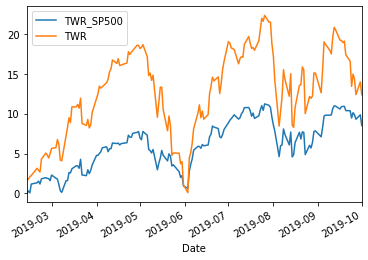

In [411]:

fig2.plot();


## PLot Histogram of period returns

In [412]:
portfolio_returns = pv[['PR']].copy()
sp500_returns = df[['PR']].copy()

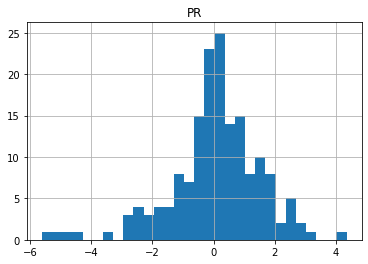

In [413]:
(portfolio_returns *100).hist(bins=30)
plt.show()


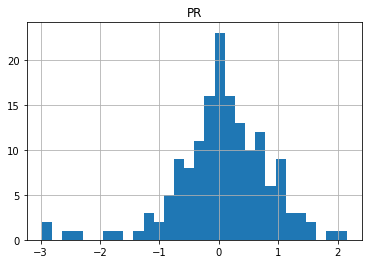

In [414]:
(sp500_returns *100).hist(bins=30)
plt.show()

In [415]:
## Top 5 daily returns

In [416]:
portfolio_returns.sort_values('PR', ascending=False).head()

,PR
Date,
2019-06-04,0.043509
2019-08-08,0.030494
2019-03-11,0.029849
2019-09-05,0.029841
2019-09-04,0.026188


In [417]:
sp500_returns.sort_values('PR', ascending=False).head()

,PR
Date,
2019-06-04,0.021486
2019-08-08,0.019020
2019-08-13,0.015170
2019-03-11,0.014678
2019-08-16,0.014592
